# Аналитика в Яндекс.Афише

### Цель проетка: изучение пользовательского поведения для оптимизации маркетинговых затрат

**Задачи проекта:**

   1. выявить как люди пользуются продуктом,
   
   2. изучить когда они начинают покупать,
   
   3. сколько денег приносит каждый клиент
   
   4. когда клиент окупается.

#### Описание данных
Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

### СТРУКТУРА ПРОЕКТА

##### 1. Изучение общей информации
*[jump to code cell 1](#cell1)

##### 2. Преобработка данных 
*[jump to code cell 2](#cell2)

##### 3. Анализ данных:

- Отчеты и метрики по продукту   *[jump to code cell 3](#cell3)

- Отчеты и метрики по продажам   *[jump to code cell 4](#cell4)

- Отчеты и метрики по маркетингу *[jump to code cell 5](#cell5)

- Рекомендации                   *[jump to code cell 6](#cell6)


### 1. ОБЩАЯ ИНФОРМАЦИЯ

<a id="cell1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits=pd.read_csv('visits_log.csv')

In [3]:
orders=pd.read_csv('orders_log.csv')

In [4]:
costs=pd.read_csv('costs.csv')

In [5]:
# посмотрим данные о визитах
visits.head(3)


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


В таблице данных о визитах посетителей представлена информация: платформы,начало и окончание сессий, рекламный источник.
Для удобства обработки инфо при преобработки данных приведем названия столбцов к нижнему регистру. Посмотрим общую инфо по визитам, тип данных, наличие пропусков

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


представлена инфо о 359400 сессий пользвователей

In [7]:
visits.dtypes

Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object

не верно указан тип дат, в преобработке изменим

In [8]:
visits['Uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: Uid, Length: 228169, dtype: int64

Всего 228169 пользователей, которые совершали сессии 359500 раз

In [9]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

Посетители в основном заходили с компьютера

In [10]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

Представлены 9 рекламных источников с которых пришли пользователи

In [11]:
visits['Start Ts'].min()

'2017-06-01 00:01:00'

In [12]:
visits['End Ts'].max()

'2018-06-01 01:26:00'

Собрана информация с 1 июня 2017г по 1 июня 2018г

In [13]:
# посмотрим данные о заказах
orders.head(6)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321


Информация о дате заказа и стоимости заказа

In [14]:
orders['Uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: Uid, Length: 36523, dtype: int64

Из 228169 пользователей покупку совершили только 36523 пользователей (16%)

In [15]:
orders['Revenue'].sum()

252057.19999999998

Выручка от всех пользователей 252057 руб

In [16]:
orders.dtypes

Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object

In [17]:
# посмотрим данные о затратах
costs.head(6)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39


Информация об затратах на разные рекламные источники в разные дни

In [18]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

In [19]:
costs.dtypes

source_id      int64
dt            object
costs        float64
dtype: object

Информация о 7 рекламных источниках

#### ВЫВОД

С 1 июня 2017 по 1 июня 2018 г было 359500 посещений на сайт Яндекс.Афиша 228169 пользователями. Из всех пользователей заказ оформили только 36523 клиентов (16%) и суммарная выручка за весь период составила 252057 руб. В основном заходили со стационарных устройств. Больше всего посещений с 4 рекламного источника. Затраты на рекламу различаются не только в зависимости от источника рекламы, но и в зависимости от даты посещения.
Для того чтобы приступить к анализу информации необходимо предварительно выполнить преобработку данных: изменить тип данных у дат и привести к нижнему регистру названия столбцов

#### 2. ПРЕОБРАБОТКА ДАННЫХ

<a id="cell2"></a>

In [20]:
# приведем к нижнему регистру названия столбцов таблицы визитов
visits.columns = visits.columns.str.lower()

In [21]:
# приведем к нижнему регистру названия столбцов таблицы визитов
orders.columns = orders.columns.str.lower()

In [22]:
# изменим тип данных даты
visits['end ts']=pd.to_datetime(visits['end ts'])

In [23]:
visits['start ts']=pd.to_datetime(visits['start ts'])

In [24]:
orders['buy ts']=pd.to_datetime(orders['buy ts'])

In [25]:
costs['dt']=pd.to_datetime(costs['dt'])

##### ВЫВОД

Названия столбцов приведины к нижнему регистру, тип данных дат изменен - можно приступать к анализу данных

### 3. АНАЛИЗ ДАННЫХ

### Оценка пользовательской активности 

###### <a id="cell3"></a>

###### Расчитаем DAU, WAU, MAU

In [26]:
visits.columns

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

In [27]:
# для начала выделим год, месяц, неделю из даты сессий
visits['year']=visits['start ts'].dt.year

In [28]:
visits['month']=visits['start ts'].dt.month

In [29]:
visits['week']=visits['start ts'].dt.week

In [30]:
visits['date']=visits['start ts'].dt.date

In [31]:
visits.head(3)

,device,end ts,source id,start ts,uid,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01


In [32]:
dau=visits.groupby('date').agg({'uid': 'nunique'}).mean()

In [33]:
dau

uid    907.991758
dtype: float64

In [34]:
wau=visits.groupby(['year','week']).agg({'uid': 'nunique'}).mean()

In [35]:
wau

uid    5716.245283
dtype: float64

In [36]:
mau=visits.groupby(['year','month']).agg({'uid': 'nunique'}).mean()

In [37]:
mau

uid    23228.416667
dtype: float64

In [38]:
# посмотрим мвовлеченность аудитории
sticky_wau=dau/wau*100

In [39]:
sticky_mau=dau/mau*100

In [40]:
sticky_wau

uid    15.884409
dtype: float64

In [41]:
sticky_mau

uid    3.90897
dtype: float64

Sticky фактор очень низкий - пользователи не задерживаются на сайте. Подробнее можно посмотреть сколько в среднем длится одна сессия и среднее количество сессий на пользователя

Text(0.5, 1.0, 'Динамика количества посетителей ')

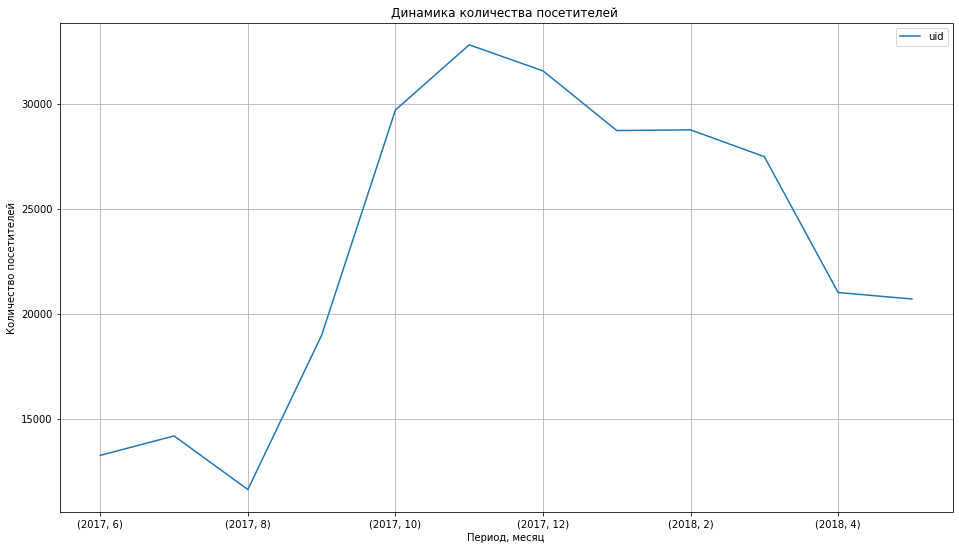

In [42]:
# посмотрим динамику количества пользователей сайта по месяцам
visits.groupby(['year','month']).agg({'uid': 'nunique'}).plot(figsize=(16,9),grid=True)
plt.xlabel('Период, месяц') 
plt.ylabel('Количество посетителей') 
plt.title('Динамика количества посетителей ')

Анализ данных показал, что в среднем в ежедневно сайт Яндекс.Афиша посещают 907 пользователей, еженедльно 5716, ежемесячно 23228. Если рассматривать период с июнь 2017 года по июнь 2018 наблюдается всплеск количества посетителей с октябь по декабрь 2017 года (возможно была проведена рекламная кампания, т.к летом 2017 года менее 15000 пользователей, а с августа 2017 г - резкое увеличение количества посетителей)

##### Пользовательская сессия

In [43]:
# сгруппируем ланные для расчета количества сессий и количества посетителей
sessions=visits.groupby(['year','month']).agg({'uid': ['count','nunique']})

In [44]:
# переименуем названия столбцов
sessions.columns = ['n_sessions', 'n_users']

In [45]:
# расчитаем количество сессий
sessions['session_per_user']=sessions['n_sessions']/sessions['n_users']

In [46]:
sessions

n_sessions  n_users  session_per_user
year month                                       
2017 6           16505    13259          1.244815
     7           17828    14183          1.256998
     8           14355    11631          1.234202
     9           23907    18975          1.259921
     10          37903    29692          1.276539
     11          43969    32797          1.340641
     12          41983    31557          1.330386
2018 1           36939    28716          1.286356
     2           37182    28749          1.293332
     3           35679    27473          1.298693
     4           26515    21008          1.262138
     5           26635    20701          1.286653

In [47]:
sessions['session_per_user'].mean()

1.2808894945992668

В среднем каждый пользователь заходит на сайт чуть более 1 раза

Text(0.5, 1.0, 'Динамика количества посетителей ')

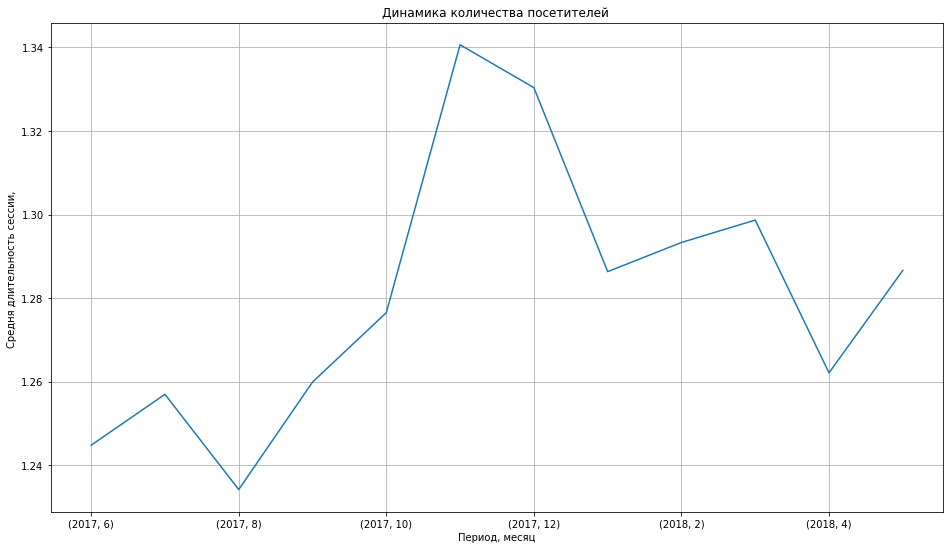

In [48]:
# посмотрим динамику изменения среднего количества сессий
sessions['session_per_user'].plot(figsize=(16,9),grid=True)
plt.xlabel('Период, месяц') 
plt.ylabel('Средня длительность сессии, ') 
plt.title('Динамика количества посетителей ')

Оказывается в период с октябрь по декабрь 2017 г увеличелось не только количество посетителей, но и вырос интерес у пользователей (увеличилась частота посещений)

Расчитаем длительность сессий

In [49]:
visits['duration'] = (visits['end ts'] - visits['start ts']).dt.seconds

In [50]:
visits['duration'].mean()

643.506488592098

Средняя длительность сессии 643 секунд

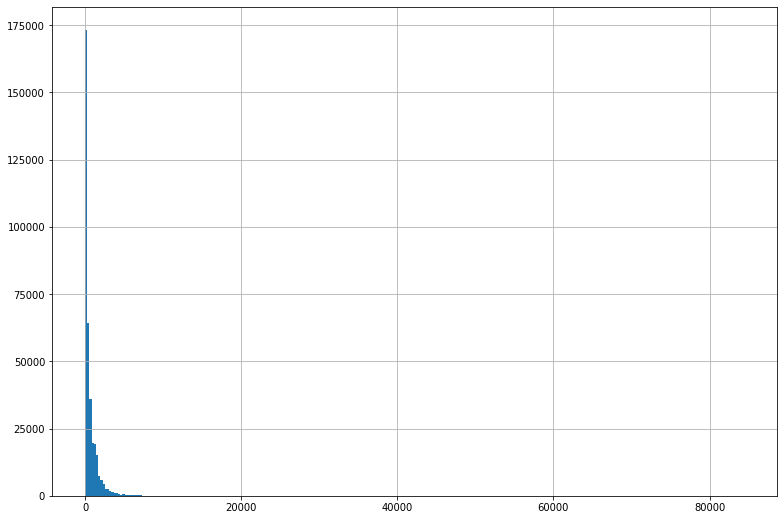

In [51]:
visits['duration'].hist(figsize=(13,9),bins=300)

In [52]:
visits['duration'].mode()

0    60
dtype: int64

In [53]:
visits[visits['duration']==60]['uid'].count()

53029

In [54]:
visits['duration'].median()

300.0

In [55]:
visits[visits['duration']<=300]['uid'].count()

190201

Хотя в среднем пользователи находятся на сайте 643 секунды, но чаще всего время нахождения на сайте всего лишь 60 секунд (14% всех сессий). Так как распределение не является нормальным для анализа лучше всего подойдет медиана: в среднем пользователи находятся на сайте 300 сек.
Для того чтобы посмотреть как меняется количество пользователей расчитаем retantion и churn rate (коэффициенты удержания и оттока пользователей)

##### Retention Rate

In [56]:
# выделим дату первого посещения

first_date=visits.groupby(['uid'])['start ts'].min()
first_date.name='first_date'
visits=visits.join(first_date,on='uid')

In [57]:
first_date

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_date, Length: 228169, dtype: datetime64[ns]

In [58]:
visits.head(3)

,device,end ts,source id,start ts,uid,year,month,week,date,duration,first_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00


In [59]:
# выделим из дат месяцы
visits['activ_month']=visits['start ts'].astype('datetime64[M]')

In [60]:
visits['first_activ_month']=visits['first_date'].astype('datetime64[M]')

In [61]:
visits['lifetime']=visits['activ_month']-visits['first_activ_month']

In [62]:
visits['lifetime']=visits['lifetime']/np.timedelta64(1,'M')

In [63]:
visits['lifetime']=visits['lifetime'].round().astype('int')

In [64]:
visits['first_activ_month']=visits['first_activ_month'].dt.strftime('%Y-%m')

In [65]:
visits.head(3)

,device,end ts,source id,start ts,uid,year,month,week,date,duration,first_date,activ_month,first_activ_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07,0


In [66]:
cohorts=visits.groupby(['first_activ_month','lifetime']).agg({'uid':'nunique'}).reset_index()

In [67]:
cohorts

,first_activ_month,lifetime,uid
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909
...,...,...,...
73,2018-03,1,861
74,2018-03,2,557
75,2018-04,0,15709
76,2018-04,1,760


In [68]:
# для расчета retention выделим количество людей изначально прибывших в когорту
initial_user=cohorts[cohorts['lifetime']==0][['first_activ_month','uid']]

In [69]:
# переименуем столбец
initial_user= initial_user.rename(columns={'uid':'cohort_users'})

In [70]:
# объединим данные
cohorts = cohorts.merge(initial_user,on='first_activ_month')

In [71]:
# считаем retention
cohorts['retention'] = (cohorts['uid']/cohorts['cohort_users'])

In [72]:
# построим сводную таблицу
retention = cohorts.pivot_table(index='first_activ_month',columns='lifetime',values='retention',aggfunc='mean')

In [73]:
retention.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activ_month,,,,,,,,,,,,
2017-06,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


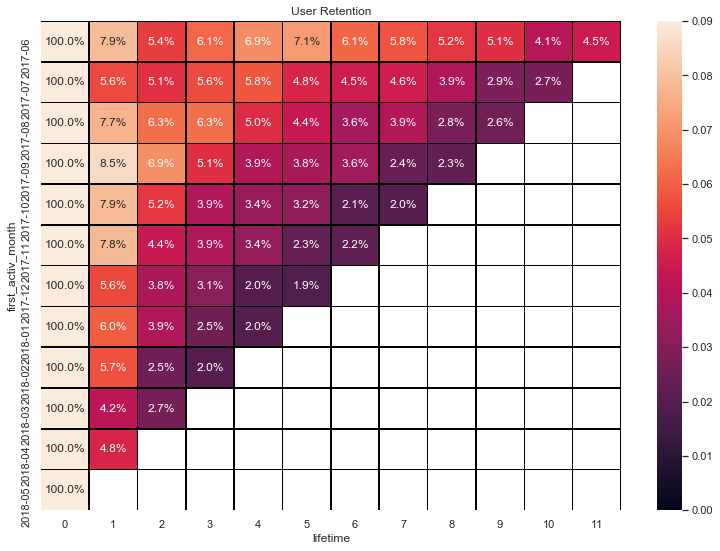

In [74]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('User Retention')
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=0.5, linecolor='black',vmin=0,vmax=0.09)

Маштабирование heatmap позволило нам увидеть что более активные первые когорты

In [75]:
# расчитаем средний retention для каждого месяца
retention_avr = cohorts.groupby(['first_activ_month']).agg({'retention':'mean'})

In [76]:
retention_avr

,retention
first_activ_month,
2017-06,0.136781
2017-07,0.132358
2017-08,0.142638
2017-09,0.151720
2017-10,0.159752
2017-11,0.177145
2017-12,0.194033
2018-01,0.228854
2018-02,0.275657


In [77]:
retention_avr.mean()

retention    0.289952
dtype: float64

Очень низкое удержание клиента, клиенты приходят и практически больше не заходят на сайт (что показал нам и sticky factor). 28% retention с учетом первого 100% захода на сайт

In [78]:
# посмотрим среднемесячный retention без учета 1-го месяца
retention_avr2=cohorts[cohorts['lifetime']!=0].groupby(['first_activ_month']).agg({'retention':'mean'})

In [79]:
retention_avr2

,retention
first_activ_month,
2017-06,0.058307
2017-07,0.045594
2017-08,0.047376
2017-09,0.045685
2017-10,0.039716
2017-11,0.040003
2017-12,0.032840
2018-01,0.036068
2018-02,0.034209


In [80]:
retention_avr2.mean()

retention    0.042056
dtype: float64

Всего лишь 4.2 % - ежемесячно после первого захода на сайт возвращаются всего 4.2% пользователей. 

### ВЫВОД

Проанализировав с июня 2017г по июнь 2018 г пользовательску активность пришли к не очень утешительным выводам.
Ежедневно на сайт заходят 907 пользователей, еженедельно - 5716, ежемесячно - 23228. sticky factor очень низкий (3.9%) - очень низкая частота и регулярность использования продукта. В среднем каждый пользователь заходит на сайт 1.28 раз, причем в среднем длительность сессии небольшая (300 сек).
Больше всего пользователей было с октября 2017 г по март 2018г.
Retention также показывает очень низкую воволеченность пользователей: в среднем после первого посещения сайта опять пользовались сайтом только 4,2% аудитории.
Для изучения низкой вовлеченность необходимо посторить воронки продаж, оценить поведение пользователей при помощи Яндекс.Метрики.
А пока изучим проанализируем продажи

### Оценка доходности

###### <a id="cell4"></a>

Посмотрим сколько времени требуется для совершения покупки. Для этого нам понадобиться инфо из 2-х таблиц: visits и ordes. Прежде чем объединить таблицы выполним сгруппируем данные в таблицах

In [81]:
visits.columns

Index(['device', 'end ts', 'source id', 'start ts', 'uid', 'year', 'month',
       'week', 'date', 'duration', 'first_date', 'activ_month',
       'first_activ_month', 'lifetime'],
      dtype='object')

In [82]:
# группируем по uid и дате первого посещения
visits_uniq=visits.groupby(['uid','first_date']).agg({'duration':'sum','lifetime':'sum'}).reset_index() 

In [83]:
visits_uniq.head(3)

,uid,first_date,duration,lifetime
0,11863502262781,2018-03-01 17:27:00,360,0
1,49537067089222,2018-02-06 15:55:00,120,0
2,297729379853735,2017-06-07 18:47:00,60,0


In [84]:
orders.columns

Index(['buy ts', 'revenue', 'uid'], dtype='object')

In [85]:
# выделим дату первого заказа

first_order=orders.groupby(['uid'])['buy ts'].min()
first_order.name='first_order'
orders=orders.join(first_order,on='uid')

In [86]:
orders.columns

Index(['buy ts', 'revenue', 'uid', 'first_order'], dtype='object')

In [87]:
orders.head(3)

,buy ts,revenue,uid,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00


Text(0.5, 1.0, 'Динамика выручки ')

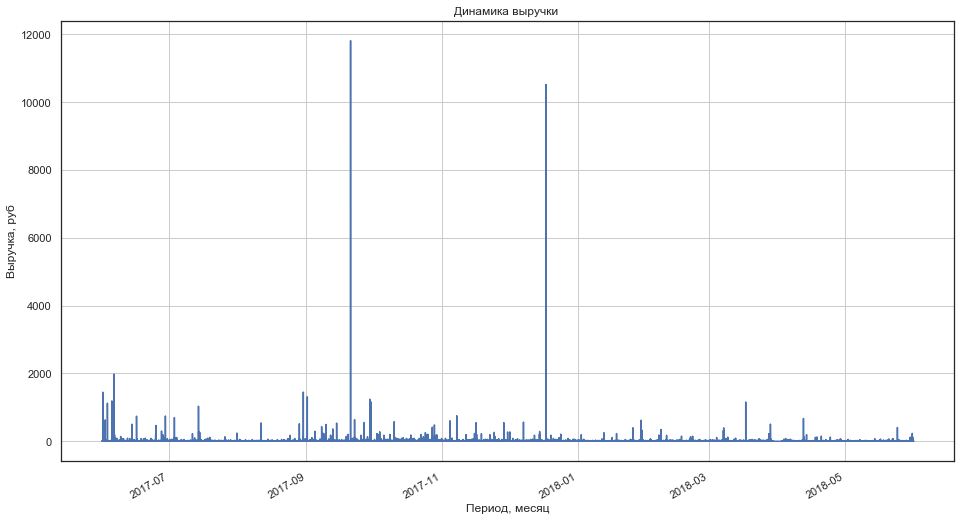

In [88]:
# посмотрим динамику покупок
orders.groupby('first_order')['revenue'].sum().plot(figsize=(16,9),grid=True)
plt.xlabel('Период, месяц') 
plt.ylabel('Выручка, руб') 
plt.title('Динамика выручки ')

In [89]:
orders[orders['revenue']>1000].groupby('first_order')[['uid','revenue']].sum()

,uid,revenue
first_order,,
2017-09-20 19:55:00,1.107935e+19,3828.92
2017-12-17 18:06:00,5.574963e+19,5720.30


20 сентября и 17 декабря от 2-х разных клиентов сайт получил большую сумму

In [90]:
# группируем заказы по uid и дате первого заказа
orders_uniq=orders.groupby(['uid','first_order']).agg({'revenue':'sum'}).reset_index()

In [91]:
orders_uniq.head(3)

,uid,first_order,revenue
0,313578113262317,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06-03 10:13:00,3.05
2,2429014661409475,2017-10-11 18:33:00,73.33


In [92]:
# объединяем таблицы
df=visits_uniq.merge(orders_uniq,on='uid')

In [93]:
df.head(3)

,uid,first_date,duration,lifetime,first_order,revenue
0,313578113262317,2017-09-18 22:49:00,1980,11,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06-03 10:13:00,960,0,2017-06-03 10:13:00,3.05
2,2429014661409475,2017-10-11 17:14:00,780,0,2017-10-11 18:33:00,73.33


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   uid          36523 non-null  uint64        
 1   first_date   36523 non-null  datetime64[ns]
 2   duration     36523 non-null  int64         
 3   lifetime     36523 non-null  int32         
 4   first_order  36523 non-null  datetime64[ns]
 5   revenue      36523 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), uint64(1)
memory usage: 1.8 MB


In [95]:
# посмотрим среднюю продолжительность на сайте у тех кто совершал покупку и у тех кто не совершал покупку
df.loc[df['revenue']==0]['duration'].median()

1140.0

In [96]:
df.loc[df['revenue']>0]['duration'].median()

1080.0

У тех кто осуществлял покупки и кто ничего не покупал примерно одинаковое время сессий

In [97]:
# будем работать с данными у которых были транзакции
df=df.loc[df['revenue']>0]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36509 entries, 0 to 36522
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   uid          36509 non-null  uint64        
 1   first_date   36509 non-null  datetime64[ns]
 2   duration     36509 non-null  int64         
 3   lifetime     36509 non-null  int32         
 4   first_order  36509 non-null  datetime64[ns]
 5   revenue      36509 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), uint64(1)
memory usage: 1.8 MB


In [99]:
# расчитаем время которое от первого захода до покупки
df['buy_time']=(df['first_order']-df['first_date']).dt.seconds/3600

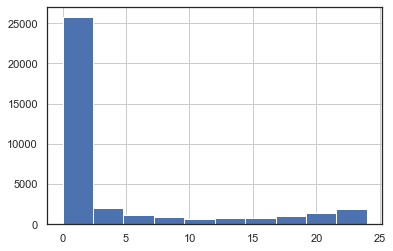

In [100]:
df['buy_time'].hist()

В основном покупают до 2.5 часов

In [101]:
df[df['buy_time']<3].count()

uid            26402
first_date     26402
duration       26402
lifetime       26402
first_order    26402
revenue        26402
buy_time       26402
dtype: int64

In [102]:
df['buy_time'].mode()

0    0.016667
dtype: float64

In [103]:
df['year']=df['first_date'].dt.year

In [104]:
df['month']=df['first_date'].dt.month

In [105]:
# для расчетов средней продолжительности от 1 посещения до покупки воспользуемся медианой
buy_time=df.groupby(['year','month'])['buy_time'].median()

In [106]:
buy_time

year  month
2017  6        0.350000
      7        0.383333
      8        0.300000
      9        0.366667
      10       0.266667
      11       0.433333
      12       0.300000
2018  1        0.250000
      2        0.200000
      3        0.166667
      4        0.183333
      5        0.166667
Name: buy_time, dtype: float64

In [107]:
buy_time.mean()

0.2805555555555555

0.28 часа (16 минут) в среднем нужно пользователю для совершения покупки. 

Изучим как часто покупают на сайте Яндекс.Афиша

In [108]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   first_order  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB


In [109]:
# исключим 0 продажи
orders=orders[orders['revenue']>0]

In [110]:
orders.head(3)

,buy ts,revenue,uid,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00


In [111]:
# выделим месяц из дат
orders['first_order_month']=orders['first_order'].astype('datetime64[M]')

In [112]:
orders['buy_month']=orders['buy ts'].astype('datetime64[M]')

In [113]:
# для расчета количества покупок сгруппируем данные
buy_number=orders.groupby(['uid','first_order_month']).agg({'buy ts':'count','revenue':'sum'})

In [114]:
buy_number.head(3)

,,buy ts,revenue
uid,first_order_month,,
313578113262317,2018-01-01,1,0.55
1575281904278712,2017-06-01,2,3.05
2429014661409475,2017-10-01,1,73.33


In [115]:
buy_number= buy_number.rename(columns={'buy ts':'number'}).reset_index()

In [116]:
# расчитаем среднее количество покупок
buy_number['number'].mode()

0    1
dtype: int64

In [117]:
buy_number['number'].median()

1.0

In [118]:
buy_number['number'].mean()

1.3794954668711825

В среднем (из тех кто покупал) осуществляли заказ только 1 раз. Что и показал нам retention, stiky factor - очень низкая вовлеченность и удержание клиента. 

In [119]:
# расчитаем месячное количество покупок 
buy_number=buy_number.groupby('first_order_month').agg({'number':'sum'})

In [120]:
buy_number

,number
first_order_month,
2017-06-01,4431
2017-07-01,2909
2017-08-01,2187
2017-09-01,3874
2017-10-01,6005
2017-11-01,5879
2017-12-01,5888
2018-01-01,4308
2018-02-01,4469


In [121]:
# посмотрим выручку от каждой когорты за весь период
orders.groupby('first_order_month')['revenue'].sum()

first_order_month
2017-06-01    24031.69
2017-07-01    16127.92
2017-08-01    11606.26
2017-09-01    34676.32
2017-10-01    27603.45
2017-11-01    26098.99
2017-12-01    33485.74
2018-01-01    16663.13
2018-02-01    16750.50
2018-03-01    19273.41
2018-04-01    11810.61
2018-05-01    13925.76
2018-06-01        3.42
Name: revenue, dtype: float64

In [122]:
orders['revenue'].sum()

252057.2

Несмотря на то что у декабрьской когорты период существования меньше чем у юильской или августвской, но денег эта когорта принесла больше всех

Text(0.5, 1.0, 'Динамика количества покупок ')

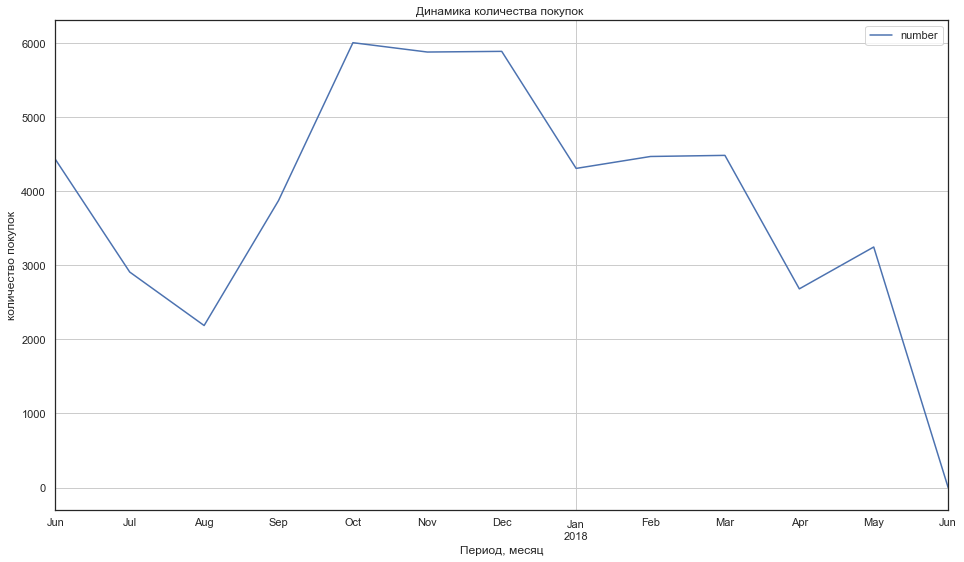

In [123]:
# посмотрим динамику покупок
buy_number.plot(figsize=(16,9),grid=True)
plt.xlabel('Период, месяц') 
plt.ylabel('количество покупок') 
plt.title('Динамика количества покупок ')

C августа увеличивается количество посетителей и растет количество покупок. Посмотрим как меняется средний чек посетителей

In [124]:
orders.head(3)

,buy ts,revenue,uid,first_order,first_order_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [125]:
# сгруппируем таблицу по первому месяцу заказа и мес заказа
orders_cohort=orders.groupby(['first_order_month','buy_month']).agg({'revenue':'sum','uid':'nunique'}).reset_index()

In [126]:
# расчитаем средний чек
orders_cohort['revenue_user']=(orders_cohort['revenue']/orders_cohort['uid']).astype('int')

In [127]:
orders_cohort.groupby('first_order_month')['revenue_user'].mean()

first_order_month
2017-06-01    21.083333
2017-07-01     9.454545
2017-08-01    11.700000
2017-09-01    30.777778
2017-10-01     7.000000
2017-11-01     6.857143
2017-12-01    24.666667
2018-01-01     7.800000
2018-02-01     5.500000
2018-03-01    11.333333
2018-04-01    10.500000
2018-05-01     4.000000
2018-06-01     3.000000
Name: revenue_user, dtype: float64

In [128]:
orders_cohort.groupby('first_order_month')['revenue_user'].mean().mean()

11.820984570984573

Средний чек варьируется от месяца к месяцу от 3 до 30 руб. В средней чек получается 11 руб

Text(0.5, 1.0, 'Динамика среднего чека ')

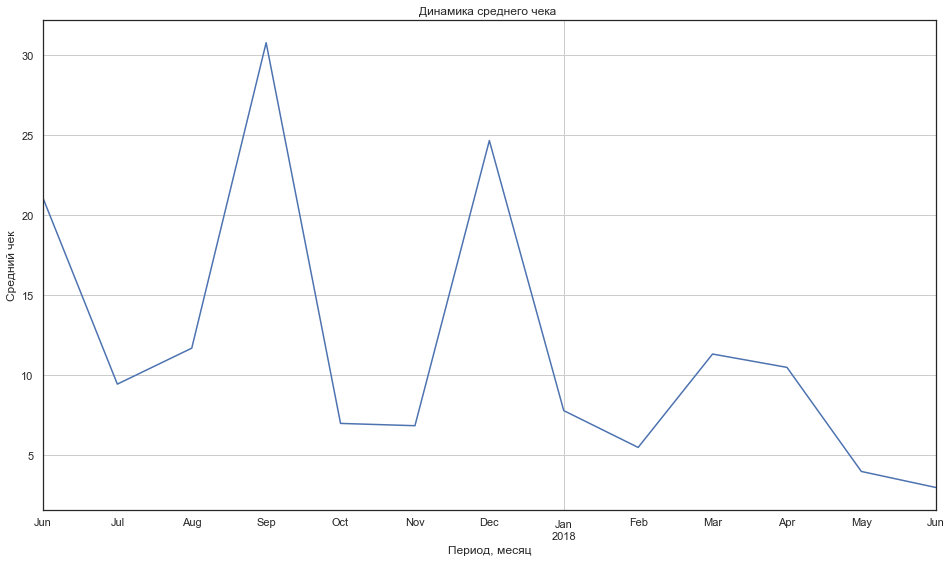

In [129]:
orders_cohort.groupby('first_order_month')['revenue_user'].mean().plot(figsize=(16,9),grid=True)
plt.xlabel('Период, месяц') 
plt.ylabel('Средний чек') 
plt.title('Динамика среднего чека ')

В сентябре и декабре 2017 г наблюдается наибольший средний чек 

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени

In [130]:
orders_cohort['lt']=orders_cohort['buy_month']-orders_cohort['first_order_month']

In [131]:
orders_cohort['lt']=orders_cohort['lt']/np.timedelta64(1,'M')

In [132]:
orders_cohort['lt']=orders_cohort['lt'].round().astype('int')

In [133]:
orders_cohort['first_order_month'] = orders_cohort['first_order_month'].dt.strftime('%Y-%m')

In [134]:
orders_pivot=orders_cohort.pivot_table(index='first_order_month',columns='lt',values='revenue_user',aggfunc='mean')

In [135]:
orders_pivot.fillna('')

lt,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.0,16,17,35,23,22,31,25,19,27,25,9
2017-07,6.0,12,21,10,6,7,6,6,7,12,11,
2017-08,5.0,11,11,12,16,12,9,12,21,8,,
2017-09,5.0,22,13,138,19,26,27,16,11,,,
2017-10,5.0,11,6,7,7,7,6,7,,,,
2017-11,5.0,7,6,12,7,4,7,,,,,
2017-12,4.0,7,39,48,27,23,,,,,,
2018-01,4.0,8,12,11,4,,,,,,,
2018-02,4.0,8,4,6,,,,,,,,


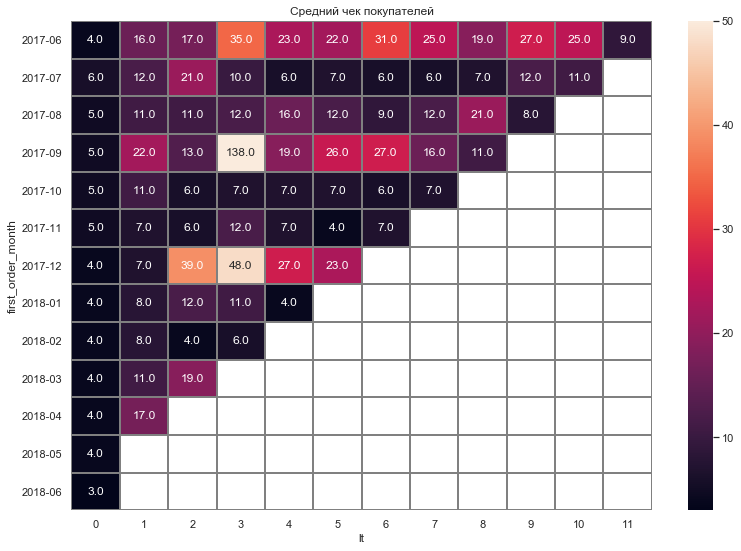

In [136]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Средний чек покупателей')
sns.heatmap(orders_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray',vmin=3,vmax=50)

У сентябрьской когорты очень высокий средний чек в декабре, посмотрим эту когорту в декабре подробнее

In [137]:
orders[(orders['first_order_month']=='2017-09-01')&(orders['buy_month']=='2017-12-01')&(orders['revenue']>50)][['uid','revenue']]

,uid,revenue
21730,5539673724080479777,58.05
21806,5539673724080479777,65.69
21906,5539673724080479777,344.36
21961,5539673724080479777,402.72
22769,5539673724080479777,360.55
23165,5539673724080479777,1195.64
23196,5539673724080479777,243.83
23244,5539673724080479777,2633.28
23483,5539673724080479777,293.03
23516,5539673724080479777,200.44


Очень много выплат за 50 руб, есть выплаты превышающее 1000 - этим и объясняется высокий средний чек

### LTV

Последнюю метрику которую мы посмотрим изучая доходность сайта - LTV

In [138]:
orders.head(3)

,buy ts,revenue,uid,first_order,first_order_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [139]:
cohorts_buy = orders.groupby(['first_order_month','buy_month']).agg({'revenue': 'sum','uid': 'nunique'}).reset_index()

In [140]:
cohorts_buy.head(3)

,first_order_month,buy_month,revenue,uid
0,2017-06-01,2017-06-01,9557.49,2022
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50


In [141]:
# LTV расчитывается исходя из прибыли
margin_rate = 1
cohorts_buy['gp'] = cohorts_buy['revenue'] * margin_rate
cohorts_buy['age'] = (cohorts_buy['buy_month'] - cohorts_buy['first_order_month']) / np.timedelta64(1, 'M')
cohorts_buy['age'] = cohorts_buy['age'].round().astype('int')

In [142]:
cohorts_buy.head(3)

,first_order_month,buy_month,revenue,uid,gp,age
0,2017-06-01,2017-06-01,9557.49,2022,9557.49,0
1,2017-06-01,2017-07-01,981.82,61,981.82,1
2,2017-06-01,2017-08-01,885.34,50,885.34,2


Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы

In [143]:
cohorts_buy['ltv'] = cohorts_buy['gp'] / cohorts_buy['uid']

In [144]:
output = cohorts_buy.pivot_table(index='first_order_month',columns='age',values='ltv',aggfunc='mean').round()

In [145]:
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,5.0,16,18,36,24,22,31,25,19,27,26,10
2017-07-01,6.0,12,21,11,7,8,6,7,7,13,12,
2017-08-01,5.0,11,12,12,17,12,10,13,21,8,,
2017-09-01,6.0,22,13,139,20,26,27,17,11,,,
2017-10-01,5.0,11,7,7,7,7,7,7,,,,
2017-11-01,5.0,7,7,13,7,5,8,,,,,
2017-12-01,5.0,8,39,48,27,24,,,,,,
2018-01-01,4.0,9,12,11,5,,,,,,,
2018-02-01,4.0,9,5,7,,,,,,,,


In [146]:
# посмотрим сколько в среднем принес каждый клиент за весь период
output.sum(axis=1)

first_order_month
2017-06-01    259.0
2017-07-01    110.0
2017-08-01    121.0
2017-09-01    281.0
2017-10-01     58.0
2017-11-01     52.0
2017-12-01    151.0
2018-01-01     41.0
2018-02-01     25.0
2018-03-01     36.0
2018-04-01     23.0
2018-05-01      5.0
2018-06-01      3.0
dtype: float64

Больше всего принесли 2 когорты - июнь 2017 и сентябрь 2017 : это объясняется временем существования коготры. Также у сентябрьской когорбы был высокий средний чек в декабре

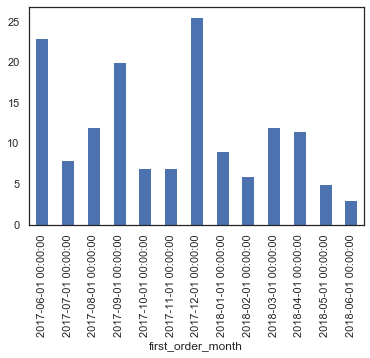

In [147]:
# посмотрим какие клиеты в среднем приносят больше денег
output.median(axis=1).plot(kind='bar')

В среднем ежемесячно больше всего приносят денег когорты: июнь 2017, сентябрь 2017 и декабрь 2017

#### ВЫВОД

Общая выручка составила 252057.2
В 20 сентября и декабре 2017 сайт получил большую выручку (возможно в эти дни были проведены акции). 36509 клиентов осуществляли транзакции; причем проводили на сайте примерно столько же времени сколько и те кто ничего не покупал. В  среднем время от первого посещения сайта до покупки занимает 16 минут. В среднем (из тех кто покупал) осуществляли заказ только 1 раз. Что и показал нам retention, stiky factor - очень низкая вовлеченность и удержание клиента. 
С августа по январь 2018 г наблидается рост покупок , с января постепенное снижение (либо сезонность, либо маркетинг, либо деятельность конкурентов - надо смотреть подробнее). Размер среднего чека 11.82 руб. Больше всего покупок было у октябрьской, ноябрьской и декабрьской когорт; больше всего компания выручила от сентябрьской, октябрьской, ноябрьской и июньской когорт (большое количество покупок, высокий средний чек). Больше всего (в среднем каждый покупатель) принесла компании июньская, сентябрьская и декабрьская когорты.

### Анализ расходов

###### <a id="cell5"></a>

In [148]:
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [149]:
costs['dt'].min()

Timestamp('2017-06-01 00:00:00')

In [150]:
costs['dt'].max()

Timestamp('2018-05-31 00:00:00')

In [151]:
# приведем к 1 дню месяца
costs['first_month'] = costs['dt'].astype('datetime64[M]')

In [152]:
costs.head(3)

,source_id,dt,costs,first_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01


In [153]:
# посмотрим сколько всего потратила компания за весь период
costs['costs'].sum()

329131.62

Общие затраты превышают выручку. Посмотрим в какой рекламный источник вложили больше всего денег и замый затратный месяц

Text(0.5, 1.0, 'Распределение затрат среди рекламных источников')

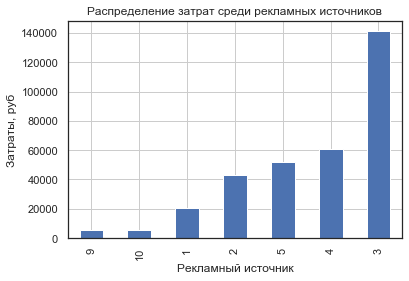

In [154]:
# посмотрим затраты на рекламные источники
costs.groupby('source_id')['costs'].sum().sort_values().plot(kind='bar',grid=True)
plt.xlabel('Рекламный источник') 
plt.ylabel('Затраты, руб') 
plt.title('Распределение затрат среди рекламных источников')

Самый затратный рекламный источник №3

Text(0.5, 1.0, 'Изменение затрат на рекламу')

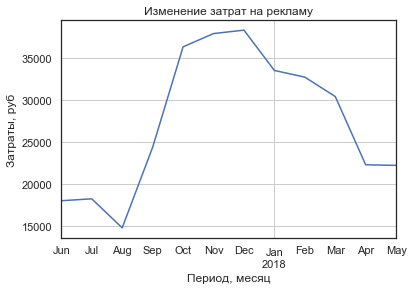

In [155]:
# посмотрим затраты по месяцам
costs.groupby('first_month')['costs'].sum().plot(grid=True)
plt.xlabel('Период, месяц') 
plt.ylabel('Затраты, руб') 
plt.title('Изменение затрат на рекламу')

График очень похож на динамику продаж (с августа рост, с января снижение). Соотнесем графики затрат и выручки

Text(0.5, 1.0, 'Динамика затрат и выручки с июня 2017 по июнь 2018гг')

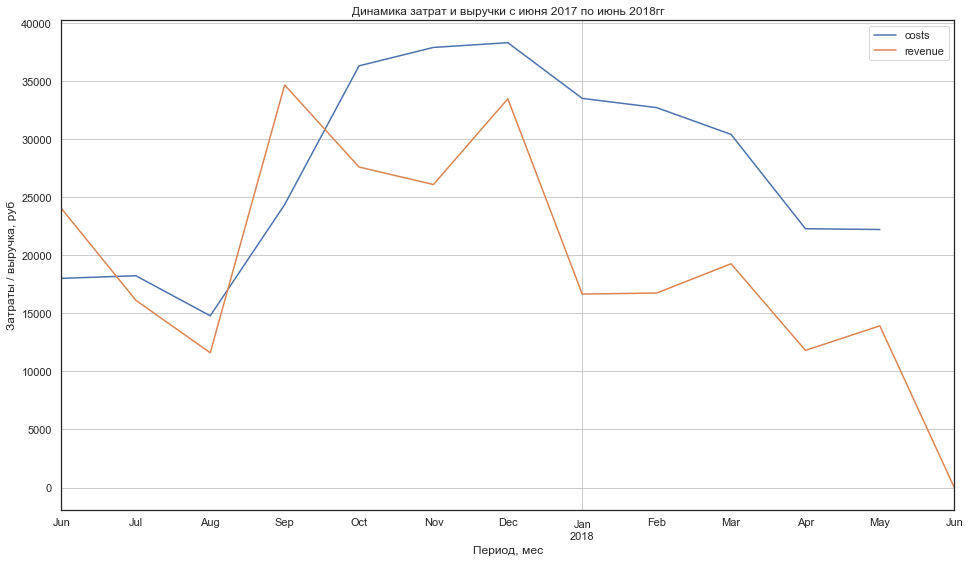

In [156]:
ax=costs.groupby('first_month')['costs'].sum().plot(figsize=(16,9),grid=True,legend=True)
orders.groupby('first_order_month')['revenue'].sum().plot(figsize=(16,9),grid=True,ax=ax,legend=True)
plt.xlabel('Период, мес') 
plt.ylabel('Затраты / выручка, руб') 
plt.title('Динамика затрат и выручки с июня 2017 по июнь 2018гг')

Наша гипотеза о том что росту продаж способствует рекламная компания подтвердилась: с ростом/уменьшением затрат происходит рост/уменьшение продаж. Только с середины сентября что-то пошло не так: затраты превышают выручку. Нельзя забывать о низкой вовлеченности посетителей.
Соотношение суммарной выручки и затрат показал что сайт не оккупается. Для большей наглядности расчитаем CAC и ROI

### САС, ROMI

Перед тем как расчитать данные метрики необходимо объединить таблицы

In [157]:
orders.head(3)

,buy ts,revenue,uid,first_order,first_order_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01


In [158]:
orders=orders.drop('buy_month',axis=1)

In [159]:
orders['uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
3501596628378158474     150
                       ... 
4591076985649693640       1
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
9505264890679494151       1
Name: uid, Length: 36509, dtype: int64

In [160]:
# преобразуем дату покупки
orders['date']=orders['buy ts'].astype('datetime64[D]')

In [161]:
order=orders.groupby(['uid','first_order_month']).agg({'revenue': 'sum'}).reset_index()

In [162]:
visits.head(3)

,device,end ts,source id,start ts,uid,year,month,week,date,duration,first_date,activ_month,first_activ_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07,0


In [163]:
# во время расчетов создали много дополнительных столбцов; для удобства дальнейших расчетов удалим их
visits=visits.drop(['year','month','week','date','first_activ_month','lifetime'],axis=1)

In [164]:
visits.head(3)

,device,end ts,source id,start ts,uid,duration,first_date,activ_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017-07-01 01:54:00,2017-07-01


In [165]:
# переменуем active_month в firts_order_month и source id в source_id
visits.columns=['device', 'end ts', 'source_id', 'start ts', 'uid', 'duration','first_date', 'first_order_month']

In [166]:
visits['date']=visits['start ts'].astype('datetime64[D]')

In [167]:
# для дальнейшего объединения сгруппируем visits; так как возможно песетители заходили с разных источников рекламы, учтем первый
visit=visits.groupby(['first_order_month','device','uid']).agg({'source_id': 'first'}).reset_index()

In [168]:
visit_order=order.merge(visit,on=['uid','first_order_month'])

In [169]:
visit_order.head(3)

,uid,first_order_month,revenue,device,source_id
0,1575281904278712,2017-06-01,3.05,touch,10
1,2429014661409475,2017-10-01,73.33,desktop,3
2,2464366381792757,2018-01-01,2.44,desktop,5


In [170]:
visit_order['source_id'].nunique()

8

In [171]:
#маржинальность равно 1 : прибыль и выручка равны
margin_rate = 1


In [172]:
# создадим итоговую табл 
report=visit_order.groupby(['first_order_month','device','source_id']).agg({'uid': 'nunique','revenue':'sum'}).reset_index()

In [173]:
report_source=visit_order.groupby(['first_order_month','source_id']).agg({'uid': 'nunique','revenue':'sum'}).reset_index()

In [174]:
report

,first_order_month,device,source_id,uid,revenue
0,2017-06-01,desktop,1,193,6236.39
1,2017-06-01,desktop,2,222,7059.57
2,2017-06-01,desktop,3,534,3112.61
3,2017-06-01,desktop,4,331,2563.69
4,2017-06-01,desktop,5,331,3275.12
...,...,...,...,...,...
164,2018-05-01,touch,3,124,567.78
165,2018-05-01,touch,4,162,694.45
166,2018-05-01,touch,5,88,334.10
167,2018-05-01,touch,9,6,25.23


In [175]:
# перейдем к затратам
costs.reset_index()

,index,source_id,dt,costs,first_month
0,0,1,2017-06-01,75.20,2017-06-01
1,1,1,2017-06-02,62.25,2017-06-01
2,2,1,2017-06-03,36.53,2017-06-01
3,3,1,2017-06-04,55.00,2017-06-01
4,4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...,...
2537,2537,10,2018-05-27,9.92,2018-05-01
2538,2538,10,2018-05-28,21.26,2018-05-01
2539,2539,10,2018-05-29,11.32,2018-05-01
2540,2540,10,2018-05-30,33.15,2018-05-01


In [176]:
costs=costs.groupby(['first_month','source_id'])['costs'].sum().reset_index()

In [177]:
costs.columns=['first_order_month', 'source_id', 'costs']

In [178]:
costs

,first_order_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [179]:
output=report_source.merge(costs,on=['first_order_month','source_id'])

In [180]:
output

,first_order_month,source_id,uid,revenue,costs
0,2017-06-01,1,234,6685.42,1125.61
1,2017-06-01,2,276,7347.56,2427.38
2,2017-06-01,3,601,3394.47,7731.65
3,2017-06-01,4,402,3021.06,3514.80
4,2017-06-01,5,395,3682.72,2616.12
...,...,...,...,...,...
79,2018-05-01,3,698,2666.84,9411.42
80,2018-05-01,4,691,3362.61,4214.21
81,2018-05-01,5,505,2043.95,3669.56
82,2018-05-01,9,47,179.71,362.17


In [181]:
output['costs'].sum()

329131.61999999994

In [182]:
# расчитаем метрики для каждого рек источника предварительно выполнив группировку
source=output.groupby('source_id').agg({'uid':'sum','revenue':'sum','costs':'sum'}).reset_index()

In [183]:
source

,source_id,uid,revenue,costs
0,1,3988,39550.82,20833.27
1,2,4209,57063.29,42806.04
2,3,8878,44044.67,141321.63
3,4,9474,52257.87,61073.60
4,5,6757,53587.12,51757.10
5,9,998,4803.32,5517.49
6,10,1249,4411.50,5822.49


In [184]:
# расчитаем cac и ltv
source['cac']=source['costs']/source['uid']
source['ltv']=source['revenue']/source['uid']
source['romi']=source['ltv']/source['cac']

In [185]:
source

,source_id,uid,revenue,costs,cac,ltv,romi
0,1,3988,39550.82,20833.27,5.223989,9.917457,1.898445
1,2,4209,57063.29,42806.04,10.170121,13.557446,1.333066
2,3,8878,44044.67,141321.63,15.918183,4.961103,0.311663
3,4,9474,52257.87,61073.60,6.446443,5.515925,0.855654
4,5,6757,53587.12,51757.10,7.659775,7.930608,1.035358
5,9,998,4803.32,5517.49,5.528547,4.812946,0.870563
6,10,1249,4411.50,5822.49,4.661721,3.532026,0.757666


Больше всех привлек аудиторию источник №4,но данный источник не оккупился. Самый дорогой источник - №3: да он привлек 8878 пользователей, но данная аутитория либо не платежеспособна, либо не хочет платить. От данного источника стоит отказаться. Больше всех денег принесла аудитория от 2 рек источника (13.5 руб с пользователя); хоть данный рек источник имеет высокую стоимость - все равно оккупается. Рек источник №9 привлек меньше всего аудитории - и не оккупился, от него стоит отказаться. Рек источник №1 оккупился (romi 1.89) - привлек небольшую аудиторию, но данная аудитория готова платить.
Стоит однозначно отказываться от таких рекламных источников как №3, №9,№10. Привлекательными рек источниками являются : №1, №2, №5. От рек источника №4 тоже не стоит отказываться (хотя и не оккупился, но привлек большую аудиторию) - возможно на данную когорту стимулировать акциями, спец предложениями.

Text(0.5, 1.0, 'Аудитория разных источников')

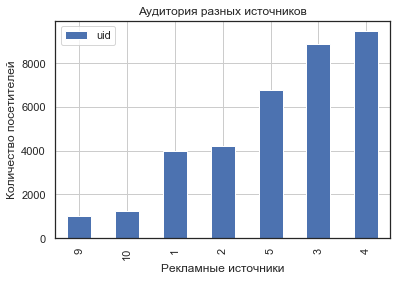

In [186]:
source.groupby('source_id')['uid'].sum().sort_values().plot(kind='bar',grid=True,legend=True)
plt.xlabel('Рекламные источники')
plt.ylabel('Количество посетителей') 
plt.title('Аудитория разных источников')

Text(0.5, 1.0, 'Оккупаемость разных источников')

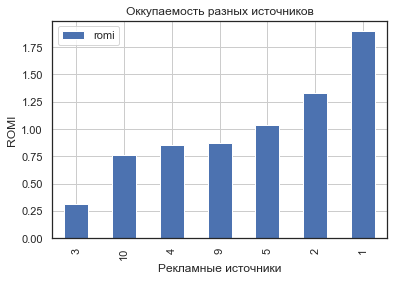

In [187]:
source.groupby('source_id')['romi'].sum().sort_values().plot(kind='bar',grid=True,legend=True)
plt.xlabel('Рекламные источники')
plt.ylabel('ROMI') 
plt.title('Оккупаемость разных источников')

### CAC, LTV и ROMI в динамике

In [188]:
# посмотрим как меняются показатели во времени
time_roi=output.groupby('first_order_month').agg({'revenue': 'sum','uid':'sum','costs':'sum'}).reset_index()

In [189]:
time_roi

,first_order_month,revenue,uid,costs
0,2017-06-01,24699.18,2070,18015.00
1,2017-07-01,16472.21,1932,18240.59
2,2017-08-01,11559.01,1339,14790.54
3,2017-09-01,36187.78,2529,24368.91
4,2017-10-01,28778.73,4315,36322.88
5,2017-11-01,27699.75,4049,37907.88
6,2017-12-01,33289.89,4248,38315.35
7,2018-01-01,16238.49,3232,33518.52
8,2018-02-01,16237.14,3505,32723.03
9,2018-03-01,19733.08,3354,30415.27


In [190]:
# расчитаем метрики
time_roi['cac']=time_roi['costs']/time_roi['uid']
time_roi['ltv']=time_roi['revenue']/time_roi['uid']
time_roi['romi']=time_roi['ltv']/time_roi['cac']

In [191]:
time_roi

,first_order_month,revenue,uid,costs,cac,ltv,romi
0,2017-06-01,24699.18,2070,18015.00,8.702899,11.931971,1.371034
1,2017-07-01,16472.21,1932,18240.59,9.441299,8.525989,0.903052
2,2017-08-01,11559.01,1339,14790.54,11.045960,8.632569,0.781514
3,2017-09-01,36187.78,2529,24368.91,9.635789,14.309126,1.484998
4,2017-10-01,28778.73,4315,36322.88,8.417817,6.669462,0.792303
5,2017-11-01,27699.75,4049,37907.88,9.362282,6.841134,0.730712
6,2017-12-01,33289.89,4248,38315.35,9.019621,7.836603,0.868840
7,2018-01-01,16238.49,3232,33518.52,10.370829,5.024285,0.484463
8,2018-02-01,16237.14,3505,32723.03,9.336100,4.632565,0.496199
9,2018-03-01,19733.08,3354,30415.27,9.068357,5.883447,0.648789


Text(0.5, 1.0, 'Динамика затрат и выручки на каждого посетителя с июня 2017 по июнь 2018гг')

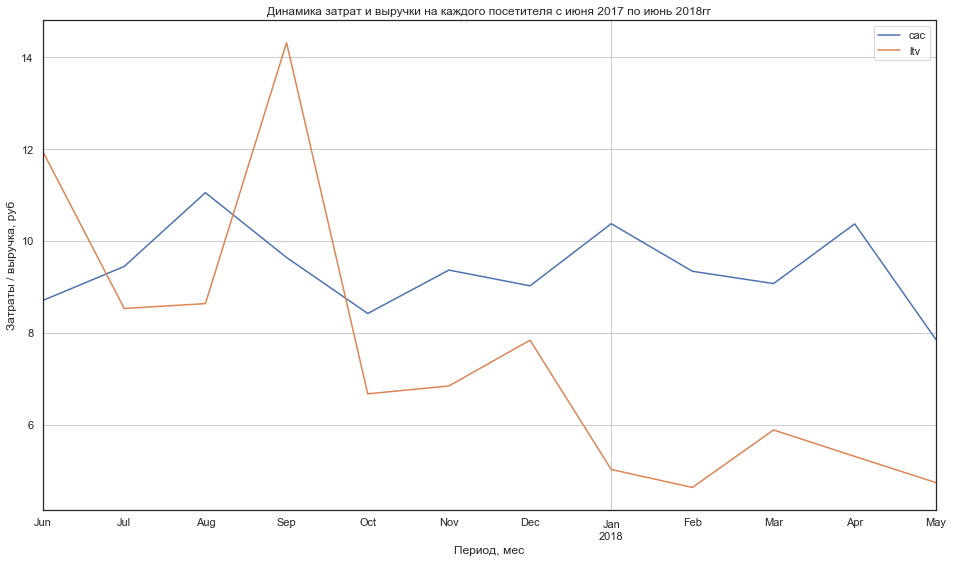

In [192]:
ax=time_roi.groupby('first_order_month')['cac'].sum().plot(figsize=(16,9),grid=True,legend=True)
time_roi.groupby('first_order_month')['ltv'].sum().plot(figsize=(16,9),grid=True,ax=ax,legend=True)
plt.xlabel('Период, мес') 
plt.ylabel('Затраты / выручка, руб') 
plt.title('Динамика затрат и выручки на каждого посетителя с июня 2017 по июнь 2018гг')

Общие и средние затраты отражают после сентября преобладание затрат над выручкой. Также после сентября снижается количество покупок. Пора проводить стимулирующие акции, делать рассылки.
Посмотрим метрики с разных устройств с которых заходили пользователи

##### DESKTOP

In [193]:
desktop=report[report['device']=='desktop']

In [194]:
desktop_output=desktop.merge(costs,on=['first_order_month','source_id'])

In [195]:
desktop_time=desktop_output.groupby('first_order_month').agg({'revenue': 'sum','uid':'sum','costs':'sum'}).reset_index()

In [196]:
# расчитаем метрики
desktop_time['cac']=desktop_time['costs']/desktop_time['uid']
desktop_time['ltv']=desktop_time['revenue']/desktop_time['uid']
desktop_time['romi']=desktop_time['ltv']/desktop_time['cac']

In [197]:
desktop_time

,first_order_month,revenue,uid,costs,cac,ltv,romi
0,2017-06-01,22724.00,1739,18015.00,10.359402,13.067280,1.261393
1,2017-07-01,13579.26,1540,18240.59,11.844539,8.817701,0.744453
2,2017-08-01,9920.18,1098,14790.54,13.470437,9.034772,0.670711
3,2017-09-01,31008.00,2047,24368.91,11.904695,15.148021,1.272441
4,2017-10-01,23381.18,3542,36322.88,10.254907,6.601124,0.643704
5,2017-11-01,21537.98,3316,37907.88,11.431809,6.495169,0.568166
6,2017-12-01,29320.73,3423,38315.35,11.193500,8.565799,0.765248
7,2018-01-01,13337.35,2579,33518.52,12.996712,5.171520,0.397910
8,2018-02-01,12817.97,2735,32723.03,11.964545,4.686644,0.391711
9,2018-03-01,14776.14,2669,30415.27,11.395755,5.536208,0.485813


In [198]:
desktop_source=desktop_output.groupby('source_id').agg({'uid':'sum','revenue':'sum','costs':'sum'}).reset_index()

In [199]:
# расчитаем метрики
desktop_source['cac']=desktop_source['costs']/desktop_source['uid']
desktop_source['ltv']=desktop_source['revenue']/desktop_source['uid']
desktop_source['romi']=desktop_source['ltv']/desktop_source['cac']

In [200]:
desktop_source

,source_id,uid,revenue,costs,cac,ltv,romi
0,1,3109,32779.61,20833.27,6.700955,10.543458,1.573426
1,2,3194,48181.62,42806.04,13.402016,15.085041,1.125580
2,3,7496,37043.88,141321.63,18.852939,4.941820,0.262125
3,4,7395,40665.46,61073.60,8.258769,5.499048,0.665844
4,5,5668,46455.87,51757.10,9.131457,8.196166,0.897575
5,9,824,3916.17,5517.49,6.695983,4.752633,0.709774
6,10,1006,3635.74,5822.49,5.787763,3.614056,0.624430


Анализ показал что в основном пользователи заходят с desktop, соответсвенно метрики по источникам и в динамике будут совпадать с общими. Посмотрим как обстоит с платформой touch

##### TOUCH

In [201]:
touch=report[report['device']=='touch']

In [202]:
touch_output=touch.merge(costs,on=['first_order_month','source_id'])

In [203]:
touch_time=touch_output.groupby('first_order_month').agg({'revenue': 'sum','uid':'sum','costs':'sum'}).reset_index()

In [204]:
# расчитаем метрики
touch_time['cac']=touch_time['costs']/touch_time['uid']
touch_time['ltv']=touch_time['revenue']/touch_time['uid']
touch_time['romi']=touch_time['ltv']/touch_time['cac']

In [205]:
touch_time

,first_order_month,revenue,uid,costs,cac,ltv,romi
0,2017-06-01,1975.18,357,18015.00,50.462185,5.532717,0.109641
1,2017-07-01,2892.95,414,18240.59,44.059396,6.987802,0.158600
2,2017-08-01,1638.83,251,14790.54,58.926454,6.529203,0.110803
3,2017-09-01,5179.78,512,24368.91,47.595527,10.116758,0.212557
4,2017-10-01,5397.55,813,36322.88,44.677589,6.639053,0.148599
5,2017-11-01,6161.77,781,37907.88,48.537618,7.889590,0.162546
6,2017-12-01,3969.16,876,38315.35,43.738984,4.531005,0.103592
7,2018-01-01,2901.14,682,33518.52,49.147390,4.253871,0.086553
8,2018-02-01,3419.17,810,32723.03,40.398802,4.221198,0.104488
9,2018-03-01,4956.94,724,30415.27,42.010041,6.846602,0.162975


In [206]:
touch_source=touch_output.groupby('source_id').agg({'uid':'sum','revenue':'sum','costs':'sum'}).reset_index()

In [207]:
# расчитаем метрики
touch_source['cac']=touch_source['costs']/touch_source['uid']
touch_source['ltv']=touch_source['revenue']/touch_source['uid']
touch_source['romi']=touch_source['ltv']/touch_source['cac']

In [208]:
touch_source

,source_id,uid,revenue,costs,cac,ltv,romi
0,1,908,6771.21,20833.27,22.944130,7.457280,0.325019
1,2,1080,8881.67,42806.04,39.635222,8.223769,0.207486
2,3,1492,7000.79,141321.63,94.719591,4.692218,0.049538
3,4,2178,11592.41,61073.60,28.041139,5.322502,0.189810
4,5,1131,7131.25,51757.10,45.762246,6.305261,0.137783
5,9,187,887.15,5517.49,29.505294,4.744118,0.160789
6,10,257,775.76,5822.49,22.655603,3.018521,0.133235


Аудитория которая заходит на сайт с touch намного меньше, тех кто заходит с desktop. Соответсвенно средние затраты будут очень высокими и romi очень низким. Сравним ltv двух платформ.

Text(0.5, 1.0, 'Динамика LTV пользователей DESKTOP и TOUCH с июня 2017 по июнь 2018гг')

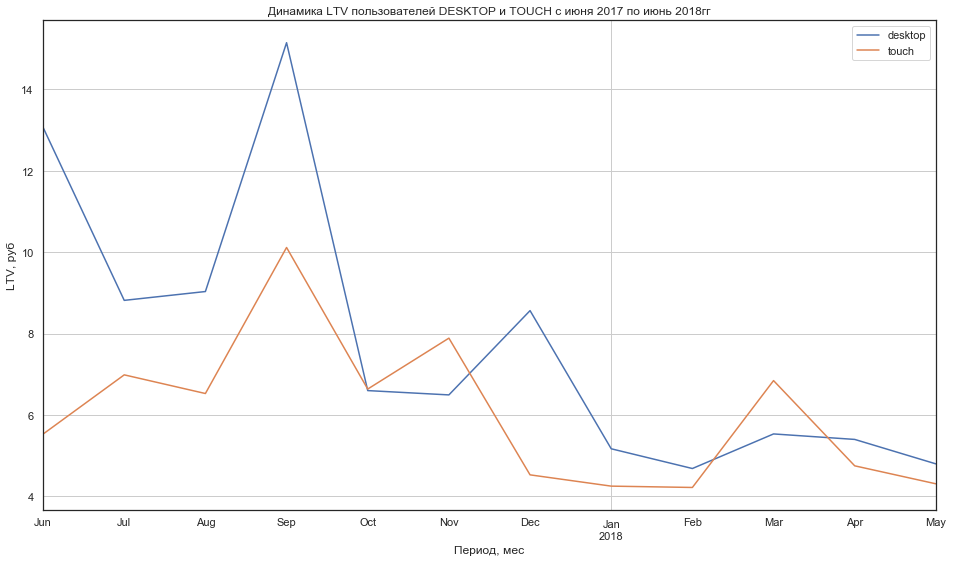

In [209]:
ax=desktop_time.groupby('first_order_month')['ltv'].sum().plot(figsize=(16,9),grid=True,label='desktop',legend=True)
touch_time.groupby('first_order_month')['ltv'].sum().plot(figsize=(16,9),grid=True,ax=ax,label='touch',legend=True)
plt.xlabel('Период, мес') 
plt.ylabel('LTV, руб') 
plt.title('Динамика LTV пользователей DESKTOP и TOUCH с июня 2017 по июнь 2018гг')

В самом начале прибыль с покупателя выше у аудитории DESKTOP, но с октября выручка у двух платформ пересекается и иногда у аудитории TOUCH данный показатель выше. Вообще после октября у сайта переломный момент: количество покупок снижается, общее среднее ltv снижается, ltv аудитории touch растет. Возможно в этот период компания решила стимулировать пользователей платформы touch- необходима дополнительная информация.

###### ВЫВОД

Наша гипотеза о том что росту продаж способствует рекламная компания подтвердилась: с ростом/уменьшением затрат происходит рост/уменьшение продаж. Только с середины сентября что-то пошло не так: затраты превышают выручку. Нельзя забывать о низкой вовлеченности посетителей. Соотношение суммарной выручки и затрат показал что сайт не оккупается. 

Больше всех привлек аудиторию источник №4,но данный источник не оккупился. Самый дорогой источник - №3: да он привлек 8878 пользователей, но данная аутитория либо не платежеспособна, либо нЕ хочет платить. От данного источника стоит отказаться. Больше всех денег принесла аудитория от 2 рек источника (13.5 руб с пользователя); хоть данный рек источник имеет высокую стоимость - все равно оккупается. Рек источник №9 привлек меньше всего аудитории - и не оккупился, от него стоит отказаться. Рек источник №1 оккупился (romi 1.89) - привлек небольшую аудиторию, но данная аудитория готова платить.
Стоит однозначно отказываться от таких рекламных источников как №3, №9,№10. Привлекательными рек источниками являются : №1, №2, №5. От рек источника №4 тоже не стоит отказываться (хотя и не оккупился, но привлек большую аудиторию) - возможно на данную когорту стимулировать акциями, спец предложениями.

Общие и средние затраты отражают после сентября преобладание затрат над выручкой. Также после сентября снижается количество покупок. Пора проводить стимулирующие акции, делать рассылки.

Анализ показал что в основном пользователи заходят с desktop, соответсвенно метрики по источникам и в динамике будут совпадать с общими. Аудитория которая заходит на сайт с touch намного меньше, тех кто заходит с desktop. Соответсвенно средние затраты будут очень высокими и romi очень низким. В самом начале прибыль с покупателя выше у аудитории DESKTOP, но с октября выручка у двух платформ пересекается и иногда у аудитории TOUCH данный показатель выше. Вообще после октября у сайта переломный момент: количество покупок снижается, общее среднее ltv снижается, ltv аудитории touch растет. Возможно в этот период компания решила стимулировать пользователей платформы touch- необходима дополнительная информация.

## ОБЩИЙ ВЫВОД

###### <a id="cell6"></a>

С 1 июня 2017 по 1 июня 2018 г было 359500 посещений на сайт Яндекс.Афиша 228169 пользователями. Из всех пользователей заказ оформили только 36523 клиентов (16%) и суммарная выручка за весь период составила 252057 руб. В основном заходили со стационарных устройств. Больше всего посещений с 4 рекламного источника. Затраты на рекламу различаются не только в зависимости от источника рекламы, но и в зависимости от даты посещения.
Для того чтобы приступить к анализу информации необходимо предварительно выполнить преобработку данных: изменить тип данных у дат и привести к нижнему регистру названия столбцов.
Проанализировав с июня 2017г по июнь 2018 г пользовательску активность пришли к неочень утешительным выводам.
Ежедневно на сайт заходят 907 пользователей, еженедельно - 5716, ежемесячно - 23228. sticky factor очень низкий (3.9%) - очень низкая частота и регулярность использования продукта. В среднем каждый пользователь заходит на сайт 1.28 раз, причем в среднем длительность сессии небольшая (300 сек).
Больше всего пользователей было с октября 2017 г по март 2018г.
Retention также показывает очень низкую воволеченность пользователей: в среднем после первого посещения сайта опять пользовались сайтом только 4,2% аудитории.
Для изучения низкой вовлеченность необходимо посторить воронки продаж, оценить поведение пользователей при помощи Яндекс.Метрики.

20 сентября и декабре 2017 сайт получил большую выручку (возможно в эти дни были проведены акции). 36509 клиентов осуществляли транзакции; причем проводили на сайте примерно столько же времени сколько и те кто ничего не покупал. В  среднем время от первого посещения сайта до покупки занимает 16 минут. В среднем (из тех кто покупал) осуществляли заказ только 1 раз. Что и показал нам retention, stiky factor - очень низкая вовлеченность и удержание клиента. 
С августа по январь 2018 г наблюдается рост покупок , с января постепенное снижение (либо сезонность, либо маркетинг, либо деятельность конкурентов - надо смотреть подробнее). Размер среднего чека 11.82 руб. Больше всего покупок было у октябрьской, ноябрьской и декабрьской когорт; больше всего компания выручила от сентябрьской, октябрьской, ноябрьской и июньской когорт (большое количество покупок, высокий средний чек). Больше всего (в среднем каждый покупатель) принесла компании июньская, сентябрьская и декабрьская когорты.

Наша гипотеза о том что росту продаж способствует рекламная компания подтвердилась: с ростом/уменьшением затрат происходит рост/уменьшение продаж. Только с середины сентября что-то пошло не так: затраты превышают выручку. Нельзя забывать о низкой вовлеченности посетителей. Соотношение суммарной выручки и затрат показал что сайт не оккупается. 

Больше всех привлек аудиторию источник №4,но данный источник не оккупился. Самый дорогой источник - №3: да он привлек 8878 пользователей, но данная аутитория либо не платежеспособна, либо нЕ хочет платить. От данного источника стоит отказаться. Больше всех денег принесла аудитория от 2 рек источника (13.5 руб с пользователя); хоть данный рек источник имеет высокую стоимость - все равно оккупается. Рек источник №9 привлек меньше всего аудитории - и не оккупился, от него стоит отказаться. Рек источник №1 оккупился (romi 1.89) - привлек небольшую аудиторию, но данная аудитория готова платить.
Стоит однозначно отказываться от таких рекламных источников как №3, №9,№10. Привлекательными рек источниками являются : №1, №2, №5. От рек источника №4 тоже не стоит отказываться (хотя и не оккупился, но привлек большую аудиторию) - возможно на данную когорту стимулировать акциями, спец предложениями.

Общие и средние затраты отражают после сентября преобладание затрат над выручкой. Также после сентября снижается количество покупок. Пора проводить стимулирующие акции, делать рассылки.

Анализ показал что в основном пользователи заходят с desktop, соответсвенно метрики по источникам и в динамике будут совпадать с общими. Аудитория которая заходит на сайт с touch намного меньше, тех кто заходит с desktop. Соответсвенно средние затраты будут очень высокими и romi очень низким. В самом начале прибыль с покупателя выше у аудитории DESKTOP, но с октября выручка у двух платформ пересекается и иногда у аудитории TOUCH данный показатель выше. Вообще после октября у сайта переломный момент: количество покупок снижается, общее среднее ltv снижается, ltv аудитории touch растет. Возможно в этот период компания решила стимулировать пользователей платформы touch- необходима дополнительная информация.

## РЕКОМЕНДАЦИИ

Анализ данных показал очень низкую вовлеченность клиентов: тратим деньги на привлечение посетителей, а удерживать аудиторию не можем. Дешевле клиента удержать, чем привлечь нового. Необходимо продолжить анализ данных и изучить воронки продаж, оценить поведение пользователей при помощи Яндекс.Метрики.
С ростом затрат на рекламу ростут продажи- реклама делает свое дело. Но низкая пользовательская активность не оккупает денег потраченных на рекламу. Стоит однозначно отказываться от таких рекламных источников как №3, №9,№10. Привлекательными рек источниками являются : №1, №2, №5. От рек источника №4 тоже не стоит отказываться (хотя и не оккупился, но привлек большую аудиторию) - возможно на данную когорту стимулировать акциями, спец предложениями.

Если рассматривать 2 платформы (desktop и touch): в самом начале периода аудитория desktop приносила больше прибыли, но в последнее время touch показывает хорошую динамику , поэтому реклама направленная на привлечение аудитории touch позволит увеличить компании выручку.

Основной вывод: реклама работает, но сайт либо не интересен, либо пользователю сложно разобраться, т.е необходимо дополнительно анализировать причину низкой вовлеченности